<a href="https://colab.research.google.com/github/Bigyajeet/2ndsemdsproject/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import cv2
import seaborn as sns
import os
import pickle
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.models import Sequential # Import Sequential model

In [2]:
from keras.datasets import cifar10

In [3]:
(xtr,ytr),(xts,yts)=cifar10.load_data()



In [4]:
xtr.shape


(50000, 32, 32, 3)

In [5]:
ytr.shape

(50000, 1)

In [6]:
ytr=ytr.reshape((ytr.shape[0]))

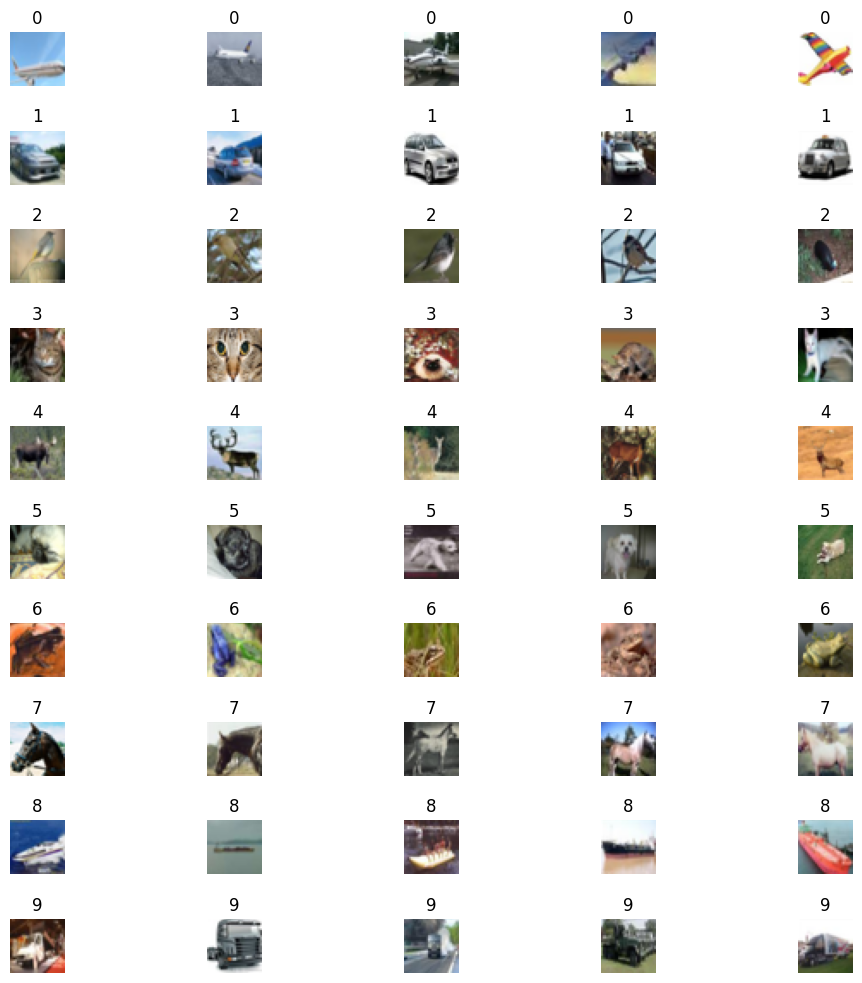

In [7]:
import matplotlib.pyplot as plt
import random
ncols=5
nclasses=10
fig,axes=plt.subplots(ncols=ncols,nrows=nclasses,figsize=(10,10))
fig.tight_layout()
for i in range(ncols):
  for j in range(nclasses):
    X_selected=xtr[ytr==j]
    axes[j][i].imshow(X_selected[random.randint(0,(len(X_selected)-1)),:,:],cmap=plt.get_cmap('gray'))

    axes[j][i].axis("off")
    axes[j][i].set_title(str(j))
plt.show()

In [8]:
def grayscale(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img

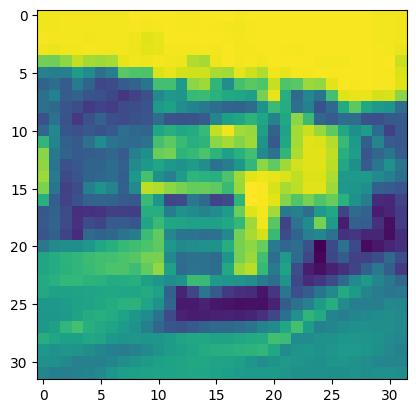

In [9]:
img=grayscale(xtr[1000])
plt.imshow(img)

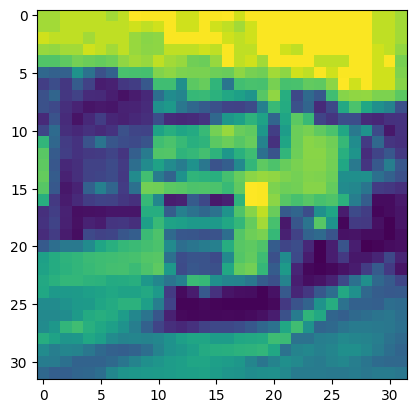

In [10]:
#intensity distribute
def equalize(img):
  img=cv2.equalizeHist(img)
  return img

img=equalize(img)
plt.imshow(img)

In [11]:
def preprocessing(img):
  img=grayscale(img)
  img=equalize(img)
  img=img/255
  return img

In [12]:
import numpy as np

xtr=np.array(list(map(preprocessing,xtr)))
xts=np.array(list(map(preprocessing,xts)))

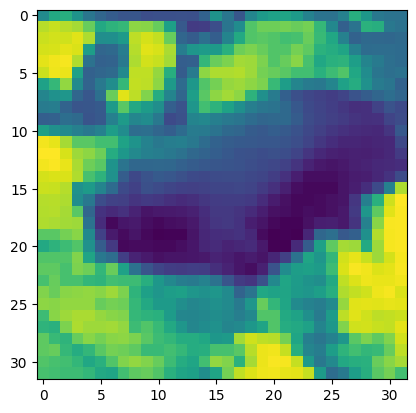

In [13]:
plt.imshow(xtr[random.randint(0,len(xtr)-1)])

In [14]:
xtr=xtr.reshape(xtr.shape[0],32,32,1)
xts=xts.reshape(xts.shape[0],32,32,1)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(width_shift_range=0.1,
                           height_shift_range=0.2,
                           zoom_range=0.2,
                           shear_range=0.1,
                           rotation_range=10)

In [16]:
datagen.fit(xtr)

In [17]:
batches=datagen.flow(xtr,ytr,batch_size=15)
X_batch,y_batch=next(batches)

In [18]:
ytr=to_categorical(ytr,10)
yts=to_categorical(yts,10)

In [19]:
def modified_model():
  model =Sequential()
  model.add(Conv2D(100, (5,5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(100, (5,5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(50, (3,3), activation='relu'))
  model.add(Conv2D(50, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10,activation='softmax'))
  model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [20]:
model=modified_model()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 100)    │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 100)    │       250,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 50)     │        45,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 50)       │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       400,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725,810 (2.77 MB)

 Trainable params: 725,810 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
h=model.fit(datagen.flow(xtr,ytr,batch_size=50),
          steps_per_epoch=2000,
            epochs=20,validation_data=(xts,yts),
            shuffle=True)

Epoch 1/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.2302 - loss: 2.0730 - val_accuracy: 0.3904 - val_loss: 1.6982
Epoch 2/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 36s 12ms/step - accuracy: 0.3708 - loss: 1.7457 - val_accuracy: 0.4553 - val_loss: 1.5378
Epoch 3/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.4416 - loss: 1.5698 - val_accuracy: 0.5299 - val_loss: 1.3340
Epoch 4/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.4841 - loss: 1.4619 - val_accuracy: 0.5648 - val_loss: 1.2247
Epoch 5/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.5077 - loss: 1.3967 - val_accuracy: 0.5827 - val_loss: 1.1785
Epoch 6/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.5243 - loss: 1.3520 - val_accuracy: 0.5879 - val_loss: 1.1726
Epoch 7/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.5409 - loss: 1.3097 - val_accuracy: 0.5989 - val_loss: 1.1441
Epoch 8/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 45s 13ms/step - accuracy: 0.5483 -

Text(0.5, 0, 'epoch')

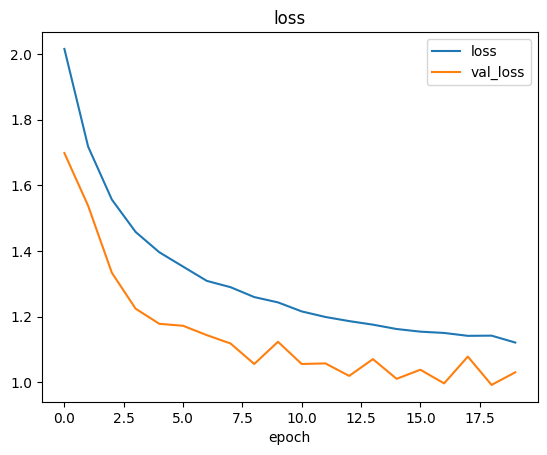

In [23]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

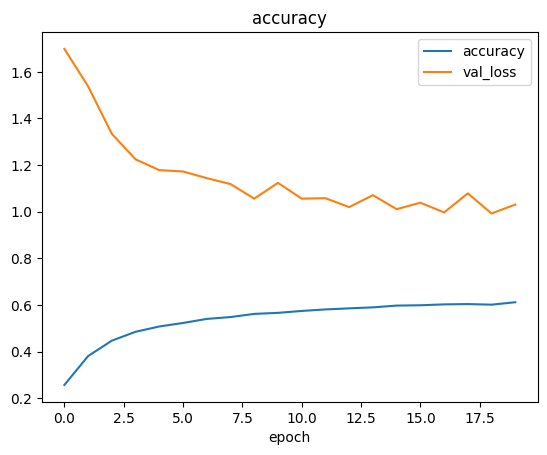

In [24]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_loss'])
plt.legend(['accuracy','val_loss'])
plt.title('accuracy')
plt.xlabel('epoch')